# Back Propagation Neural Network

> BP using libraries - December 2024
>
> NEC First Assignment - Universitat Rovira i Virgili
>
> *Andrea Pujals Bocero*

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#read the csv data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [12]:
#print the training and testing sets shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 9) (8000, 1)
(2000, 9) (2000, 1)


In the BP implementation using tensorflow libraries we will try two different optimizers. Stochastic Gradient Descent (SGD) and Adam which adapts dynamically the momentum. Comment and uncomment sections depending on which model want to run.

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model with an Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly specify the input shape
    Dense(8, activation="sigmoid"),     # Hidden layer 1
    Dense(4, activation="sigmoid"),      # Hidden layer 2
    Dense(1)                          # Output layer
])

# Uncomment the optimizer to use

# SGD Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.2)
model.compile(optimizer=sgd, loss="mse", metrics=["mae", "mape"])

# Adam Optimizer
#adam = tf.keras.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer=adam, loss="mse", metrics=["mae", "mape"])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200, 
    verbose=2    # Show progress per epoch
)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse, mae, mape = model.evaluate(X_test, y_test)
print(f"Test MSE: {mse:.4f}, Test MAE: {mae:.4f}, Test MAPE: {mape:.2f}%")

Epoch 1/200
250/250 - 1s - 5ms/step - loss: 0.0515 - mae: 0.1819 - mape: 24934.1992 - val_loss: 0.0531 - val_mae: 0.1812 - val_mape: 293.2549
Epoch 2/200
250/250 - 0s - 1ms/step - loss: 0.0453 - mae: 0.1676 - mape: 23126.7031 - val_loss: 0.0435 - val_mae: 0.1635 - val_mape: 277.6383
Epoch 3/200
250/250 - 0s - 1ms/step - loss: 0.0336 - mae: 0.1385 - mape: 12349.8789 - val_loss: 0.0279 - val_mae: 0.1256 - val_mape: 198.2421
Epoch 4/200
250/250 - 0s - 1ms/step - loss: 0.0190 - mae: 0.0968 - mape: 2554.6025 - val_loss: 0.0144 - val_mae: 0.0815 - val_mape: 81.4985
Epoch 5/200
250/250 - 0s - 1ms/step - loss: 0.0110 - mae: 0.0710 - mape: 6807.2866 - val_loss: 0.0098 - val_mae: 0.0648 - val_mape: 70.0987
Epoch 6/200
250/250 - 0s - 1ms/step - loss: 0.0086 - mae: 0.0659 - mape: 11809.2529 - val_loss: 0.0081 - val_mae: 0.0640 - val_mape: 80.0943
Epoch 7/200
250/250 - 0s - 1ms/step - loss: 0.0078 - mae: 0.0644 - mape: 17119.5352 - val_loss: 0.0074 - val_mae: 0.0612 - val_mape: 88.1037
Epoch 8/200


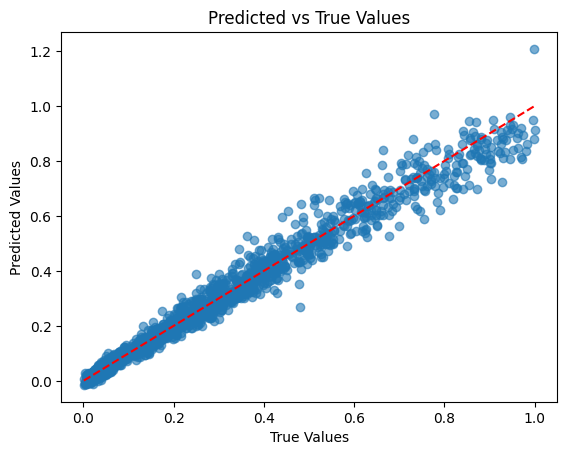

In [15]:
# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Values")
plt.show()
